<a href="https://colab.research.google.com/github/Sri777harsha/FML/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The k-means clustering is a technique which is used to classify the data into 'k' groups based on the means of the distances of points in groups.  It is used for unsupervised machine learning approach.  We will calculate distance by using euclidean distance formulae. By the end we need to label the unclassified data into classified data by labelling them.

In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn import preprocessing as prepro
import sklearn.metrics as met
from sklearn.preprocessing import MinMaxScaler as mms
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('/content/drive/MyDrive/IRIS.csv')

EDA(Exploratory Data Analysis)

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data=data.drop('species',axis=1)
print(data.shape)
data.head()


(150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
print(data.keys())

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [7]:
x=data.drop(columns=['petal_length','petal_width'], axis=1)
x.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


The minmaxscaler is used to scale the feature values to a given range

In [14]:
scaler=mms() #mms->MinMaxScaler 
#scaler is the object for the class MinMaxScaler
scale=scaler.fit_transform(x)
data_scale=pd.DataFrame(scale,columns=['sepal_length','sepal_width'])
data_scale.head()

,sepal_length,sepal_width
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


In the below cell we are using KMeans class to train the model. We created an object km and passed n_clusters value as 3.
Here we passed three because as we know that we have to group them into 3 clusters so we passed 3 as argument.

suppose, if we dont know to how many clusters to be grouped, we follow elbow approach to find the number of clusters we have to do. We see it in after few steps


In [9]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(x)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [10]:
km.cluster_centers_

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.418     ]])

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

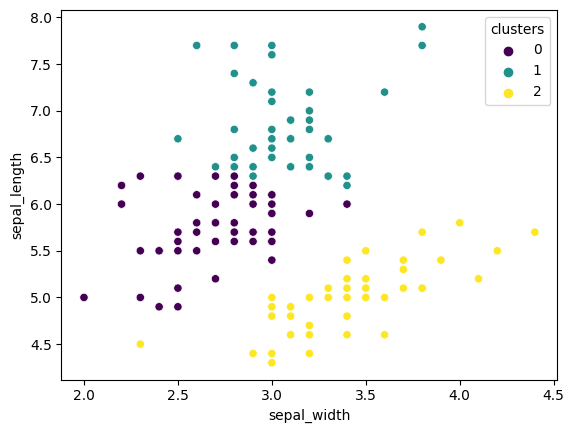

In [11]:
data['clusters']=km.labels_
sns.scatterplot(y='sepal_length',x='sepal_width',hue='clusters',data=data, palette='viridis')

Now we go through Elbow approach:
->In this approach we dont know how many clusters should be there, so we verify for each k from 2 to n and then we find wcss (within clusters sum of squared errors for each 'k'), then we plot a graph between k and wcss at the optimal value of k, we get an elbow that k is selected as number of clusters to be grouped


In [22]:
ran=range(2,12)
points=[]
for i in ran:
  means=cluster.KMeans(n_clusters=i)
  means=means.fit(data_scale)
  points_iter=means.inertia_
  points.append(points_iter)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

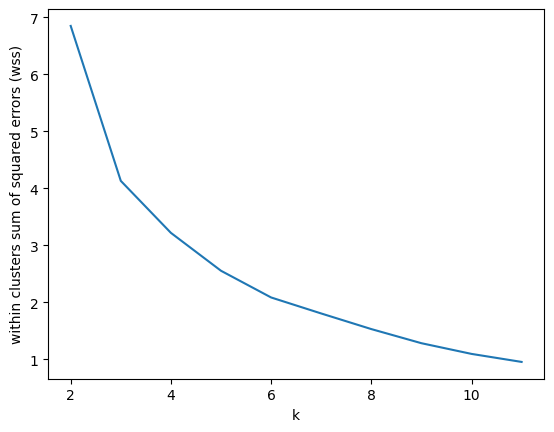

In [23]:
plt.xlabel('k')
plt.ylabel('within clusters sum of squared errors (wss)')
plt.plot(ran,points)

From the above graph we came to know that at k=3 we get an edge. so, we group for 3 clusters